In [89]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd

# file 
data_path = ['data']
filepath = os.sep.join(data_path + ['UserA.txt'])
filepath2 = os.sep.join(data_path + ['UserB.txt'])

# columns
names = ['Start Date', 'Start Time', 'End Date', 'End Time', 'Activity']

# read data
data = pd.read_csv(filepath, sep='\s+', names=names, skiprows=2)
data['Start_Time'] = data['Start Date'] + ' ' + data['Start Time']
data['End_Time'] = data['End Date'] + ' ' + data['End Time']

# clean columns
data.drop(['Start Date', 'Start Time', 'End Date', 'End Time'], axis=1, inplace=True)

# convert datatime columns
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])


# data2
data2 = pd.read_csv(filepath2, sep='\s+', names=names, skiprows=2)
data2['Start_Time'] = data2['Start Date'] + ' ' + data2['Start Time']
data2['End_Time'] = data2['End Date'] + ' ' + data2['End Time']
# clean columns
data2.drop(['Start Date', 'Start Time', 'End Date', 'End Time'], axis=1, inplace=True)
# convert datatime columns
data2['Start_Time'] = pd.to_datetime(data2['Start_Time'])
data2['End_Time'] = pd.to_datetime(data2['End_Time'])


data.head(10)

,Activity,Start_Time,End_Time
0,Sleeping,2011-11-28 02:27:59,2011-11-28 10:18:11
1,Toileting,2011-11-28 10:21:24,2011-11-28 10:23:36
2,Showering,2011-11-28 10:25:44,2011-11-28 10:33:00
3,Breakfast,2011-11-28 10:34:23,2011-11-28 10:43:00
4,Grooming,2011-11-28 10:49:48,2011-11-28 10:51:13
5,Spare_Time/TV,2011-11-28 10:51:41,2011-11-28 13:05:07
6,Toileting,2011-11-28 13:06:04,2011-11-28 13:06:31
7,Leaving,2011-11-28 13:09:31,2011-11-28 13:29:09
8,Spare_Time/TV,2011-11-28 13:38:40,2011-11-28 14:21:40
9,Toileting,2011-11-28 14:22:38,2011-11-28 14:27:07


In [90]:
d1 = data.copy(deep=True)
d2 = data2.copy(deep=True)
d1.head(5)

,Activity,Start_Time,End_Time
0,Sleeping,2011-11-28 02:27:59,2011-11-28 10:18:11
1,Toileting,2011-11-28 10:21:24,2011-11-28 10:23:36
2,Showering,2011-11-28 10:25:44,2011-11-28 10:33:00
3,Breakfast,2011-11-28 10:34:23,2011-11-28 10:43:00
4,Grooming,2011-11-28 10:49:48,2011-11-28 10:51:13


In [91]:
d1['Duration'] = (d1['End_Time'] - d1['Start_Time']).map(lambda x: x.seconds/60)
d2['Duration'] = (d2['End_Time'] - d2['Start_Time']).map(lambda x: x.seconds/60)
d1.head(5)

,Activity,Start_Time,End_Time,Duration
0,Sleeping,2011-11-28 02:27:59,2011-11-28 10:18:11,470.200000
1,Toileting,2011-11-28 10:21:24,2011-11-28 10:23:36,2.200000
2,Showering,2011-11-28 10:25:44,2011-11-28 10:33:00,7.266667
3,Breakfast,2011-11-28 10:34:23,2011-11-28 10:43:00,8.616667
4,Grooming,2011-11-28 10:49:48,2011-11-28 10:51:13,1.416667


In [92]:
# Filter
sd1 = d1[d1['Activity']=='Sleeping']
sd2 = d2[d2['Activity']=='Sleeping']
dd1 = pd.DataFrame(sd1.values,columns=['Activity', 'Start', 'End', 'Duration'])
dd2 = pd.DataFrame(sd2.values,columns=['Activity', 'Start', 'End', 'Duration'])
dd2.head()

,Activity,Start,End,Duration
0,Sleeping,2012-11-12 01:54:00,2012-11-12 09:31:59,457.983
1,Sleeping,2012-11-13 01:30:00,2012-11-13 08:52:59,442.983
2,Sleeping,2012-11-14 00:29:00,2012-11-14 05:12:59,283.983
3,Sleeping,2012-11-14 05:16:00,2012-11-14 09:01:59,225.983
4,Sleeping,2012-11-15 00:10:00,2012-11-15 00:39:59,29.9833


In [93]:
dd1['Hour'] = dd1['Start'].map(lambda x: x.hour + (x.minute/60))
dd2['Hour'] = dd2['Start'].map(lambda x: x.hour + (x.minute/60))
dd2.head()

,Activity,Start,End,Duration,Hour
0,Sleeping,2012-11-12 01:54:00,2012-11-12 09:31:59,457.983,1.900000
1,Sleeping,2012-11-13 01:30:00,2012-11-13 08:52:59,442.983,1.500000
2,Sleeping,2012-11-14 00:29:00,2012-11-14 05:12:59,283.983,0.483333
3,Sleeping,2012-11-14 05:16:00,2012-11-14 09:01:59,225.983,5.266667
4,Sleeping,2012-11-15 00:10:00,2012-11-15 00:39:59,29.9833,0.166667


In [95]:
# data2
dd3 = pd.read_csv(os.sep.join(data_path + ['SimA.csv']))
dd3['Start_time'] = pd.to_datetime(dd3['Start_time'])
dd3['End_time'] = pd.to_datetime(dd3['End_time'])
dd3['Hour'] = dd3['Start_time'].map(lambda x: x.hour + (x.minute/60))
dd3.head()

dd4 = pd.read_csv(os.sep.join(data_path + ['SimB.csv']))
dd4['Start_time'] = pd.to_datetime(dd4['Start_time'])
dd4['End_time'] = pd.to_datetime(dd4['End_time'])
dd4['Hour'] = dd4['Start_time'].map(lambda x: x.hour + (x.minute/60))


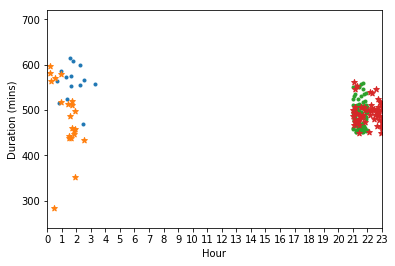

In [97]:
import matplotlib.pyplot as plt

plt.xlim(0, 23)
plt.xticks(range(24))
plt.ylim(240, 720)
plt.xlabel('Hour')
plt.ylabel('Duration (mins)')

plt.scatter(dd1['Hour'], dd1['Duration'], marker='.')
plt.scatter(dd2['Hour'], dd2['Duration'], marker='*')
plt.scatter(dd3['Hour'], dd3['Duration'], marker='.')
plt.scatter(dd4['Hour'], dd4['Duration'], marker='*')


plt.show()


In [100]:
dd1.to_csv('DD1.csv')
dd2.to_csv('DD2.csv')
dd3.to_csv('DD3.csv')
dd4.to_csv('DD4.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

axx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X_train = dataset[:600, :]
X_test = dataset[600:733, :]
X_outliers = dataset[733:, :]

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


print(X_train.shape[0])
print(X_test.shape[0])
print(X_outliers.shape[0])
print(n_error_train)
print(n_error_test)
print(n_error_outliers)